# Part 1: Data Cleaning and Preprocessing

## 1.1 Load and Inspect the Dataset
__1.1.1__ Load the dataset and display its shape, column names, and data types.

__1.1.2__  Identify and list the number of missing values in each column.

In [100]:
import pandas as pd

# 1.1.1 Load the dataset and display its shape, column names, and data types.
df = pd.read_csv('Traffic_Incidents_20250117.csv')
df.shape             #shape
df.columns           #Columns names
df.info              # data types 


# 1.1.2. Identify and list the number of missing values in each column..
number_missing_values = df.isnull().sum()    #Missing data for each column


########################## Code to display the output in a well-organized format #####################################
# 1.1.1 Load the dataset and display its shape, column names, and data types.
print('\n')
print((' '*10),'1.1.1. LOAD THE DATASET AND DISPLAY ITS SHAPE, COLUMNS, AND DATA TYPES.', '\n')
print(('_'*40), 'SHAPE OF THE df',('_'*40 ))
print('\n','The shape of the df is',df.shape[0],'rows and',df.shape[1],'columns','\n')
print(('_'*38), 'NAME OF EACH COLUMN',('_'*38 ), '\n')
print(df.columns)
print(('_'*36), 'DATA TYPE IN EACH COLUMN',('_'*36 ))
print(df.info(), '\n')
print('\n')

# 1.1.2. Identify and list the number of missing values in each column.
print((' '*13),'1.1.2. IDENTIFY AND LIST THE NUMBER OF MISSING VALUES IN EACH COLUMN')
print('_'*97)
print(number_missing_values)



           1.1.1. LOAD THE DATASET AND DISPLAY ITS SHAPE, COLUMNS, AND DATA TYPES. 

________________________________________ SHAPE OF THE df ________________________________________

 The shape of the df is 52209 rows and 10 columns 

______________________________________ NAME OF EACH COLUMN ______________________________________ 

Index(['INCIDENT INFO', 'DESCRIPTION', 'START_DT', 'MODIFIED_DT', 'QUADRANT',
       'Longitude', 'Latitude', 'Count', 'id', 'Point'],
      dtype='object')
____________________________________ DATA TYPE IN EACH COLUMN ____________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52209 entries, 0 to 52208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INCIDENT INFO  52209 non-null  object 
 1   DESCRIPTION    52207 non-null  object 
 2   START_DT       52209 non-null  object 
 3   MODIFIED_DT    38152 non-null  object 
 4   QUADRANT       38150 non-nul

## 1.3 Extracting and Cleaning Data Using Regex
• **Use Regex only to:**

__1.3.1__ START_DATE modificarlo para sacar las fechas, y el tiempo. 



In [102]:
import pandas as pd

# 1.3.1 START TIME
df['S DATE_TIME'] = pd.to_datetime(
    df['START_DT'].str.extract(r'(\d{4}/\d{2}/\d{2}) (\d{2}:\d{2}:\d{2} [APM]{2})')
    .agg(' '.join, axis=1),
    format='%Y/%m/%d %I:%M:%S %p'
)

# MODIFIED TIME 
extracted = df['MODIFIED_DT'].str.extract(r'(\d{4}/\d{2}/\d{2}) (\d{2}:\d{2}:\d{2} [APM]{2})')  #Extract values with regex
df['MODIFIED DATE_TIME'] = pd.to_datetime(                                                      #Change the Type to datetime without error because of nun values
    extracted[0].fillna('') + ' ' + extracted[1].fillna('00:00:00 AM'), 
    format='%Y/%m/%d %I:%M:%S %p',
    errors='coerce' 
)


#Difference betweent strat time and modified time 
df['DIFFERENCE']= df['MODIFIED DATE_TIME']- df['S DATE_TIME']




# 2. Identificar solo informacion que necesitamos 

1.4.1 Sacar primero del 2024 

1.4.2 Quitar columnas inecesarias 

In [108]:
# Solo del 2024 
df_2024 = df[df['S DATE_TIME'].dt.year == 2024].reset_index(drop=True)

#Eliminar columnas inecesarias
df_2024 = df_2024.drop(columns=['START_DT', 'MODIFIED_DT', 'Point'])


In [142]:
df_2024.sort_values('S DATE_TIME')

,INCIDENT INFO,DESCRIPTION,QUADRANT,Longitude,Latitude,Count,id,S DATE_TIME,MODIFIED DATE_TIME,DIFFERENCE
1206,Westbound Mcknight Boulevard and Southbound S...,Traffic incident.,NE,-113.926491,51.096374,1,2024-01-01T00:02:0751.09637406670815-113.92649...,2024-01-01 00:02:07,2024-01-01 00:06:50,0 days 00:04:43
1207,Eastbound 17 Avenue and 47 Street SE,Traffic incident. Blocking the right lane,SE,-113.965758,51.037916,1,2024-01-01T01:26:5151.037915518351824-113.9657...,2024-01-01 01:26:51,2024-01-01 01:29:20,0 days 00:02:29
1208,Northbound Centret and 1 Street SW,Two vehicle incident. Blocking the right lane,SW,-114.062554,51.051290,1,2024-01-01T03:10:0651.05128977838979-114.06255...,2024-01-01 03:10:06,2024-01-01 03:12:19,0 days 00:02:13
1209,Southbound Sarcee Trail and Bow Trail SW,There is an incident involving a pedestrian- E...,SW,-114.164337,51.052742,1,2024-01-01T06:56:4351.05274243773417-114.16433...,2024-01-01 06:56:43,2024-01-01 07:00:26,0 days 00:03:43
1210,Crowchild Trail and Mount Royal Gate SW,Traffic incident.,SW,-114.120760,51.008767,1,2024-01-01T12:16:2551.00876733918147-114.12076...,2024-01-01 12:16:25,2024-01-01 13:13:05,0 days 00:56:40
...,...,...,...,...,...,...,...,...,...,...
7486,52 Street and McKenzie Towne Boulevard SE,Traffic incident.,SE,-113.958717,50.918301,1,2024-12-31T22:12:1650.91830077004213-113.95871...,2024-12-31 22:12:16,2024-12-31 22:17:40,0 days 00:05:24
7490,Southbound Deerfoot Trail at Anderson Road SE,Traffic incident.,SE,-114.026634,50.954065,1,2024-12-31T22:16:1150.954064789730026-114.0266...,2024-12-31 22:16:11,2025-01-01 00:19:14,0 days 02:03:03
7491,Southbound Deerfoot Trail at Memorial Drive SE,Traffic incident. Blocking multiple lanes,SE,-114.013631,51.045357,1,2024-12-31T23:10:2251.04535659010204-114.01363...,2024-12-31 23:10:22,2025-01-01 00:34:43,0 days 01:24:21
7488,Eastbound 12 Avenue approaching 5 Street SW,Traffic incident. Blocking multiple lanes,SW,-114.075319,51.041751,1,2024-12-31T23:18:2951.041750526936205-114.0753...,2024-12-31 23:18:29,2024-12-31 23:33:06,0 days 00:14:37


# 3. Informacion descriptiva  

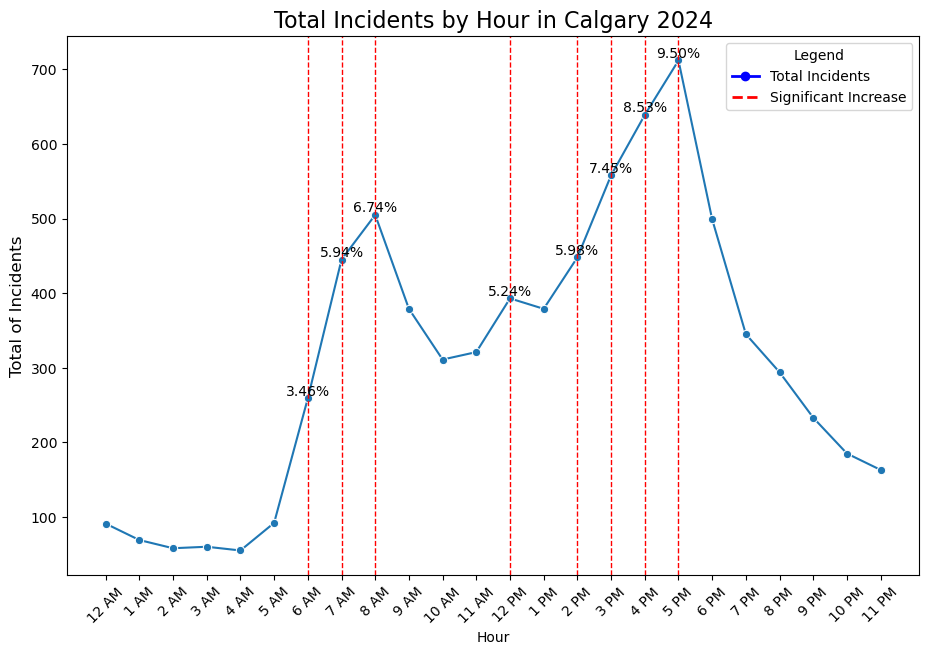

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns


df_hour = df_2024.groupby(df_2024['S DATE_TIME'].dt.hour).agg(
    Total = ('Count', 'sum')
).reset_index()


df_hour = df_hour.rename(columns={'S DATE_TIME': 'Hour'})
df_hour['Percentage'] =  (df_hour['Total'] / df_hour['Total'].sum()) * 100

def hour_to_ampm(hour):
    if hour == 0:
        return '12 AM'
    elif 1 <= hour < 12:
        return f'{hour} AM'
    elif hour == 12:
        return '12 PM'
    else:
        return f'{hour - 12} PM'

df_hour['Hour'] = df_hour['Hour'].apply(hour_to_ampm)
df_hour.sort_values('Hour').reset_index(drop=True)

# ----------------------

df_hour['Difference'] = df_hour['Total'].diff()

threshold = df_hour['Total'].max() * 0.08
df_hour['Significant Increase'] = df_hour['Difference'] > threshold

# Crear el gráfico
plt.figure(figsize=(11, 7))
sns.lineplot(
    data=df_hour,
    x='Hour',
    y='Total',
    marker='o',
    label='Total Incidents',
)


for i in range(1, len(df_hour)):  
    if df_hour['Significant Increase'].iloc[i]:  
        plt.axvline(x=i, color='red', linestyle='--', linewidth=1)  
        plt.text(
            x=i,
            y=df_hour['Total'].iloc[i],
            s=f'{df_hour['Percentage'].iloc[i]:.2f}%',  
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )


plt.title('Total Incidents by Hour in Calgary 2024', fontsize=16)
plt.ylabel('Total of Incidents', fontsize=12)
plt.xticks(rotation=45)

# Añadir leyenda manualmente para las líneas rojas
red_line = plt.Line2D([0], [0], color='red', linestyle='--', linewidth=2, label='Significant Increase')
blue_line = plt.Line2D([0], [0], color='blue', linewidth=2, marker='o', label='Total Incidents')

plt.legend(handles=[blue_line, red_line], title="Legend", loc='upper right')


plt.show()

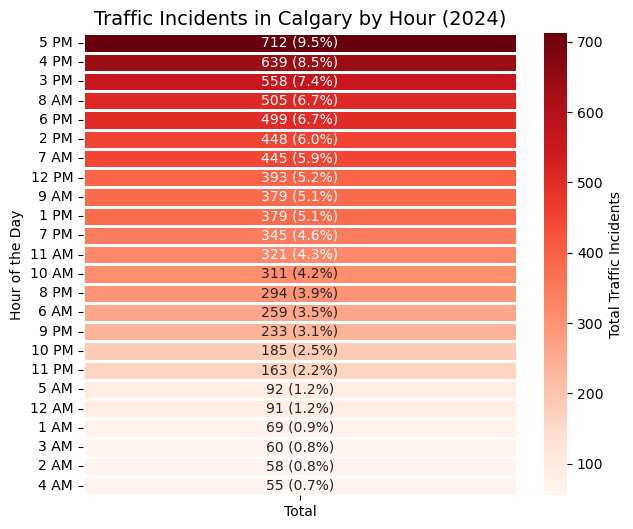

In [246]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_hour = df_2024.groupby(df_2024['S DATE_TIME'].dt.hour).agg(
    Total = ('Count', 'sum')
).reset_index()

df_hour = df_hour.rename(columns={'S DATE_TIME': 'Hour'})
df_hour['Percentage'] =  (df_hour['Total'] / df_hour['Total'].sum()) * 100

def hour_to_ampm(hour):
    if hour == 0:
        return '12 AM'
    elif 1 <= hour < 12:
        return f'{hour} AM'
    elif hour == 12:
        return '12 PM'
    else:
        return f'{hour - 12} PM'
df_hour['Hour AM/PM'] = df_hour['Hour'].apply(hour_to_ampm)

df_hour = df_hour.sort_values(by='Total', ascending=False).reset_index(drop=True)

df_hour['Display'] = df_hour.apply(lambda row: f"{row['Total']} ({row['Percentage']:.1f}%)", axis=1)
df_heatmap = df_hour.set_index('Hour AM/PM')[['Total']]
plt.figure(figsize=(7, 6))
ax = sns.heatmap(df_heatmap, annot=df_hour[['Display']], cmap="Reds", fmt='', linewidths=0.9, 
                 cbar_kws={'label': 'Total Traffic Incidents'})
plt.title('Traffic Incidents in Calgary by Hour (2024)', fontsize=14)
plt.xlabel('')
plt.ylabel('Hour of the Day')
plt.show()



In [265]:
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7493 entries, 0 to 7492
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   INCIDENT INFO       7493 non-null   object         
 1   DESCRIPTION         7493 non-null   object         
 2   QUADRANT            7493 non-null   object         
 3   Longitude           7493 non-null   float64        
 4   Latitude            7493 non-null   float64        
 5   Count               7493 non-null   int64          
 6   id                  7493 non-null   object         
 7   S DATE_TIME         7493 non-null   datetime64[ns] 
 8   MODIFIED DATE_TIME  7493 non-null   datetime64[ns] 
 9   DIFFERENCE          7493 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(4), timedelta64[ns](1)
memory usage: 585.5+ KB


# DAY

     Weekday  Total
0     Monday   1050
1    Tuesday   1187
2  Wednesday   1238
3   Thursday   1211
4     Friday   1214
5   Saturday    898
6     Sunday    695


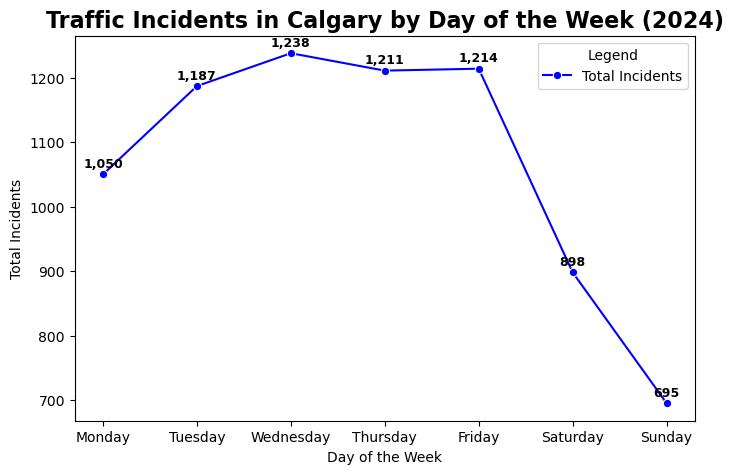

In [309]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch


df_day = df_2024.groupby(df_2024['S DATE_TIME'].dt.weekday).agg(
    Total = ('Count', 'sum')
).reset_index()

day_mapping = {
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
}

df_day = df_day.rename(columns={'S DATE_TIME': 'Weekday'})
df_day['Weekday'] = df_day['Weekday'].map(day_mapping)

print(df_day)

plt.figure(figsize=(8, 5))
ax = sns.lineplot(
    data=df_day, 
    x='Weekday', 
    y='Total', 
    marker='o', 
    linestyle='-', 
    color='b', 
    label="Total Incidents"
)

for i, row in df_day.iterrows():
    plt.text(
        x=row['Weekday'], 
        y=row['Total'] + (max(df_day['Total']) * 0.009),  
        s=f"{row['Total']:,}",  
        ha='center', 
        fontsize=9, 
        fontweight='bold'
    )

# Configurar título y etiquetas
plt.title("Traffic Incidents in Calgary by Day of the Week (2024)", fontsize=16, fontweight='bold')
plt.xlabel("Day of the Week", fontsize=10)
plt.ylabel("Total Incidents", fontsize=10)
plt.legend(title="Legend", loc='upper right')
plt.show()

# MONTH

        Month  Total
0     January    767
1    February    507
2       March    686
3       April    448
4         May    565
5        June    564
6        July    632
7      August    573
8   September    625
9     October    723
10   November    826
11   December    577


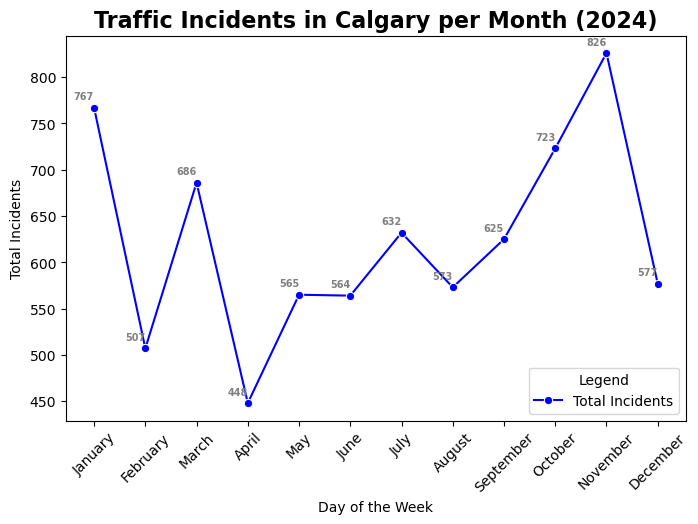

In [351]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

df_month = df_2024.groupby(df_2024['S DATE_TIME'].dt.month).agg(
    Total = ('Count', 'sum')
).reset_index()




month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}



df_month = df_month.rename(columns={'S DATE_TIME': 'Month'})
df_month['Month'] = df_month['Month'].map(month_mapping)
print(df_month)


#---------------------------------------------------------------
plt.figure(figsize=(8, 5))
ax = sns.lineplot(
    data=df_month, 
    x='Month', 
    y='Total', 
    marker='o', 
    linestyle='-', 
    color='b', 
    label="Total Incidents"
)

for i, row in df_month.iterrows():
    plt.text(
        x=row['Month'], 
        y=row['Total'] + (max(df_day['Total']) * 0.007),  
        s=f"{row['Total']:,}",  
        ha='right', 
        fontsize=7, 
        fontweight='bold',
        color='gray'
    )

# Configurar título y etiquetas
plt.title("Traffic Incidents in Calgary per Month (2024)", fontsize=16, fontweight='bold')
plt.xlabel("Day of the Week", fontsize=10)
plt.ylabel("Total Incidents", fontsize=10)
plt.xticks(rotation=45)
plt.legend(title="Legend", loc='lower right')
plt.show()